In [1]:
# cd("/home/xinhou/radPV")
include("helper.jl");

### LinePlots

In [2]:
# calc 20-yr centered mean;  
runMean(arr) = [mean(arr[i-9:i+10]) for i in 10:(size(arr,1)-10)] 

runMean (generic function with 1 method)

In [3]:
function getTS(var, s, m) # get time series by ssp, model
    path = joinpath(myPath, var, ssps[s], "year")
    fn = joinpath(path, readdir(path)[m])
    ts = dropdims(ncread(fn, var); dims=(1,2))
    return ts 
end

getTS (generic function with 1 method)

In [4]:
function getCh(var, m) # 200-yr time series of 1-model change
    varH = getTS(var, 1, m)
    var1 = getTS(var, 2, m)
    var5 = getTS(var, 5, m)

    var1long = cat(varH, var1; dims=1) # concatenate historical and ssp series
    var5long = cat(varH, var5; dims=1)

    ref = mean(varH[1:51]) # 1850-1900
    var1ch = runMean(var1long[end-208:end]) .- ref # 1892-2100
    var5ch = runMean(var5long[end-208:end]) .- ref
    return var1ch, var5ch
end

getCh (generic function with 1 method)

In [5]:
function getMult(v) # multi-model mean of variable
    var = vars[v]
    arr1 = zeros(190,34)
    arr5 = zeros(190,34)
    for m in 1:34
        arr1[:,m], arr5[:,m] = getCh(var, m)
    end
    return arr1, arr5
end

getMult (generic function with 1 method)

In [6]:
tas1ch, tas5ch = getMult(1)
rsds1ch, rsds5ch = getMult(2);

In [7]:
tas1chMd, tas5chMd, rsds1chMd, rsds5chMd = median.([tas1ch, tas5ch, rsds1ch, rsds5ch]; dims=2);

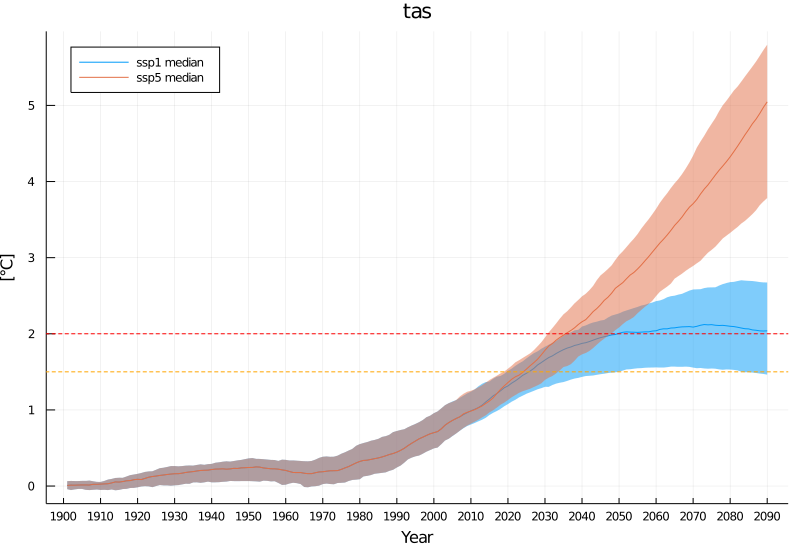

In [8]:
yr = 1901:2090
p1 = Plots.plot(yr, tas1chMd, ribbon=rib(tas1ch, tas1chMd),
          label="ssp1 median", leg=:topleft, xlabel="Year", ylabel="[°C]", 
          xticks=1900:10:2100, title="tas", size=(800,550)) #, dpi=200) 
plot!(yr, tas5chMd, ribbon=rib(tas5ch, tas5chMd),label="ssp5 median")
hline!([1.5, 2], line = (:dash, [:orange, :red]), label=false)

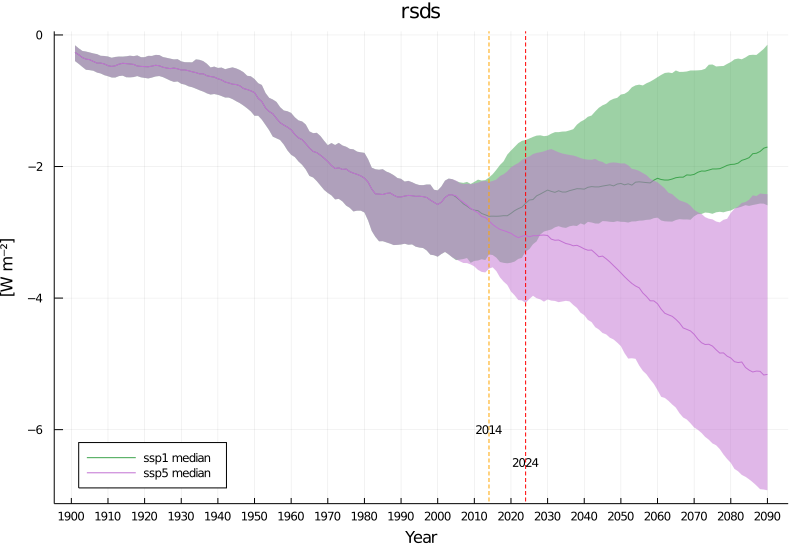

In [9]:
p2 = Plots.plot(yr, rsds1chMd, ribbon=rib(rsds1ch, rsds1chMd),
          label="ssp1 median", leg=:bottomleft, xlabel="Year", ylabel="[W m⁻²]", 
          xticks=1900:10:2100, title="rsds", color=3, size=(800,550)) #, dpi=200) 
plot!(yr, rsds5chMd, ribbon=rib(rsds5ch, rsds5chMd),label="ssp5 median", color=4)

vline!([2014, 2024], line=(:dash, [:orange, :red]), label=false) 
annotate!([(2014,-6, Plots.text("2014", 8)), (2024,-6.5, Plots.text("2024", 8))]) 

In [10]:
# cd("fig")
# png(p1, "1-tasCh")
# png(p2, "1-rsdsCh");

### ClimMaps

In [11]:
path1 = joinpath(myPath, vars[1], ssps[1], "month")
rmcp(path1)
fn = joinpath(path1, readdir(path1)[1])
lon = ncread(fn, "lon")
lat = ncread(fn, "lat");

In [12]:
num(var) = length(readdir(joinpath(myPath, var, ssps[1], "month")))

num (generic function with 1 method)

In [13]:
function getArr(var, s, m) # get arrays by variable, ssp, model
    path = joinpath(myPath, var, ssps[s], "month")
    rmcp(path)
    fn = joinpath(path, readdir(path)[m])
    m in [5,6] ?
        arr = ncread(fn, var)[:,:,end-238:end] :
        arr = ncread(fn, var)[:,:,end-239:end]
    return arr
end

getArr (generic function with 1 method)

In [14]:
function getChMap(var, m) # 20yrx12mon time series of 1-model change 
    varH = getArr(var, 1, m)
    var1 = getArr(var, 2, m)
    var5 = getArr(var, 5, m)
    ref, var1mn, var5mn = mean.([varH, var1, var5]; dims=3)

    var1ch = dropdims(var1mn .- ref; dims=3)
    var5ch = dropdims(var5mn .- ref; dims=3)
    return var1ch, var5ch
end

getChMap (generic function with 1 method)

In [15]:
function getMultMap(v) # multi-model mean
    var = vars[v]
    len = num(var)
    println(len)  
    arr1 = zeros(144,72,len)
    arr5 = zeros(144,72,len)
    for m in 1:len
        println(m)
        arr1[:,:,m] = getChMap(var, m)[1]
        arr5[:,:,m] = getChMap(var, m)[2]
    end
    return arr1, arr5
end

getMultMap (generic function with 1 method)

In [16]:
tasCh1, tasCh5 = getMultMap(1)
rsdsCh1, rsdsCh5 = getMultMap(2)
rsdscsCh1, rsdscsCh5 = getMultMap(3)
cltCh1, cltCh5 = getMultMap(4);

35
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
35
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
31
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
33
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [17]:
tasCh1Mn,       tasCh5Mn,
rsdsCh1Mn,     rsdsCh5Mn, 
rsdscsCh1Mn, rsdscsCh5Mn,
cltCh1Mn,       cltCh5Mn = 
avg.([tasCh1,       tasCh5,
      rsdsCh1,     rsdsCh5,
      rsdscsCh1, rsdscsCh5,
      cltCh1,       cltCh5]);

In [18]:
tas1Agr,       tas5Agr,
rsds1Agr,     rsds5Agr, 
rsdscs1Agr, rsdscs5Agr,
clt1Agr,       clt5Agr = 
agreeDots.([tasCh1,       tasCh5,
            rsdsCh1,     rsdsCh5,
            rsdscsCh1, rsdscsCh5,
            cltCh1,       cltCh5]);

In [19]:
varCh = [tasCh1Mn,       tasCh5Mn,
         rsdsCh1Mn,     rsdsCh5Mn, 
         rsdscsCh1Mn, rsdscsCh5Mn,
         cltCh1Mn,       cltCh5Mn];

varAgr = [tas1Agr,       tas5Agr, 
          rsds1Agr,     rsds5Agr, 
          rsdscs1Agr, rsdscs5Agr, 
          clt1Agr,       clt5Agr];

labs = ["[°C]", "[°C]", 
        "[W m⁻²]", "[W m⁻²]",
        "[W m⁻²]", "[W m⁻²]",
        "[%]", "[%]"];

tls = ["ssp1 \ntas ", "ssp5 \ntas",
       "rsds", "rsds",
       "rsdscs", "rsdscs",
       "clt", "clt"];

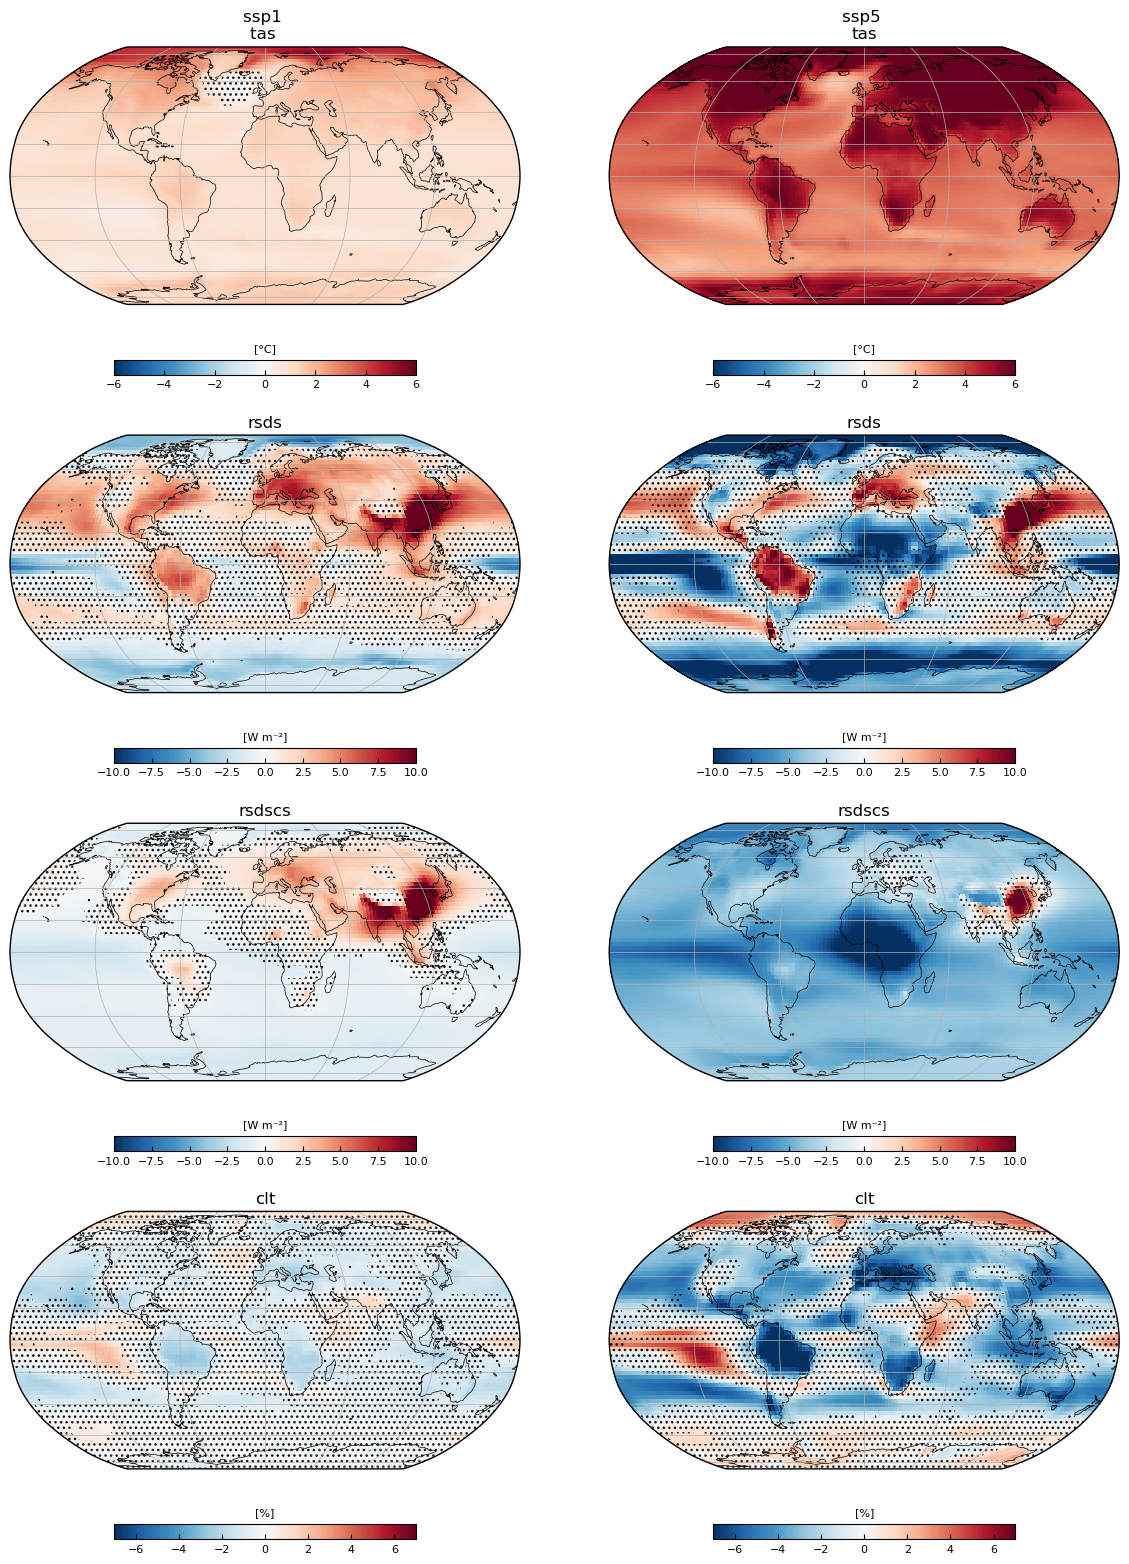

In [20]:
fig = plt.figure(figsize=(13,16))
for i in 1:8
    ax = plt.subplot(4, 2, i, projection=proj2)
    ax.coastlines(linewidth=.5)
    ax.gridlines(linewidth=.5)
    wrap_data, wrap_lon = cput.add_cyclic_point(varCh[i]', coord=lon, axis=1)
    wrap_agr, wrap_lon = cput.add_cyclic_point(varAgr[i], coord=lon, axis=1)    
    if i <= 2
        vmin, vmax = -6, 6
    elseif i >= 7
        vmin, vmax = -7, 7
    else
        vmin, vmax = -10, 10
    end
    p = ax.pcolormesh(wrap_lon, lat, wrap_data, transform=proj1, cmap="RdBu_r", vmin=vmin, vmax=vmax)
    ax.pcolor(wrap_lon, lat, wrap_agr, transform=proj1, alpha=0., hatch="...") 
    title(tls[i], size=12)
    
    cbar = plt.colorbar(p, shrink=0.45, orientation="horizontal") 
    cbar.ax.set_title(labs[i], size=8)
    cbar.ax.tick_params(direction="in", labelsize=8)
end
plt.tight_layout()

#### Europe layout

In [21]:
varChh = [tasCh1Mn, rsdsCh1Mn, rsdscsCh1Mn, cltCh1Mn,
          tasCh5Mn, rsdsCh5Mn, rsdscsCh5Mn, cltCh5Mn];

varAgrr = [tas1Agr, rsds1Agr, rsdscs1Agr, clt1Agr,
           tas5Agr, rsds5Agr, rsdscs5Agr, clt5Agr];

labss = ["[°C]", "[W m⁻²]", "[W m⁻²]", "[%]",
         "[°C]", "[W m⁻²]", "[W m⁻²]", "[%]"];

tlss = ["ssp1 tas ", "rsds", "rsdscs", "clt", 
        "ssp5 tas ", "rsds", "rsdscs", "clt"];

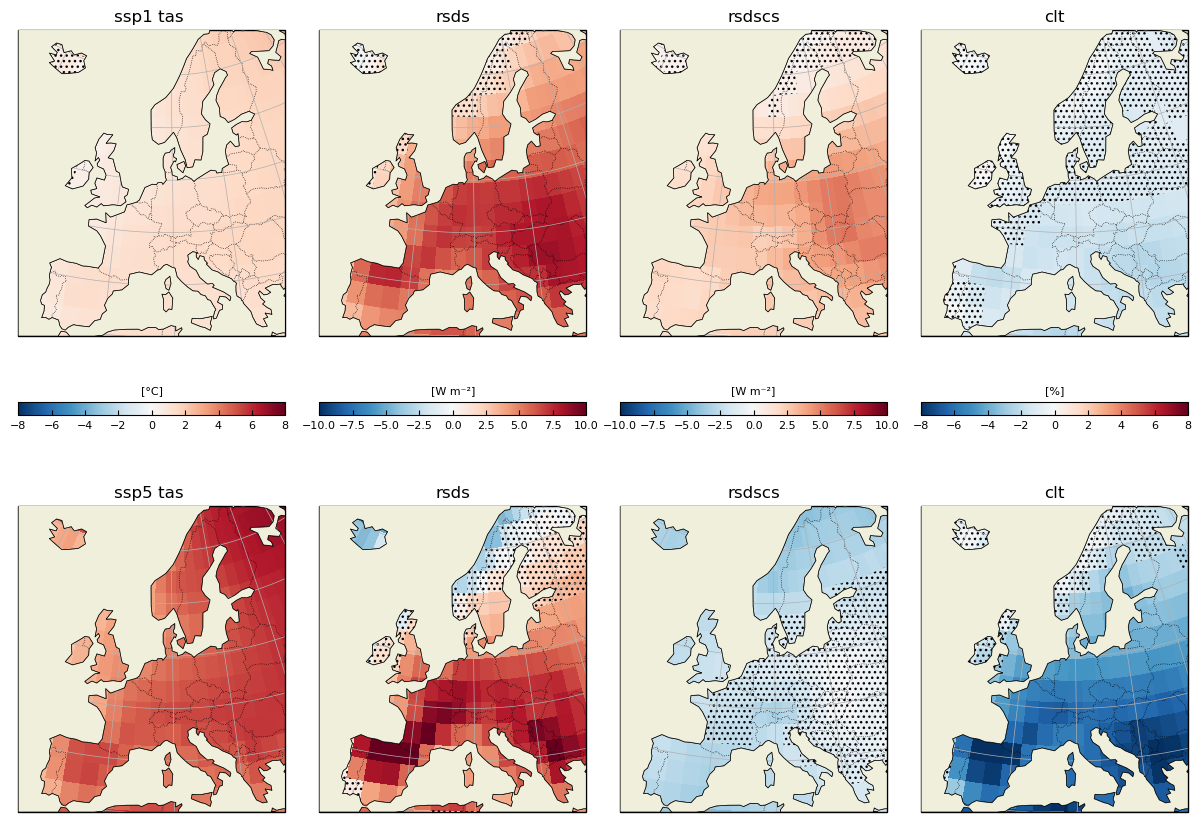

In [22]:
fig = plt.figure(figsize=(12,9))
for i in 1:8
    ax = plt.subplot(2, 4, i, projection=proj3)
    ax.coastlines(linewidth=.5)
    ax.gridlines(linewidth=.5)
    ax.add_feature(cfeature.BORDERS, linewidth=.5, linestyle=":")
    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor="k", lw=.5, facecolor=cfeature.COLORS["land"]) 
    wrap_data, wrap_lon = cput.add_cyclic_point(varChh[i]', coord=lon, axis=1)    
    wrap_agr, wrap_lon = cput.add_cyclic_point(varAgrr[i], coord=lon, axis=1)     
    i in [1,4,5,8] ?
        (vmin, vmax) = (-8, 8) : (vmin, vmax) = (-10, 10)
    p = ax.pcolormesh(wrap_lon, lat, wrap_data, transform=proj1, cmap="RdBu_r", vmin=vmin, vmax=vmax)
    ax.pcolor(wrap_lon, lat, wrap_agr, transform=proj1, alpha=0., hatch="...") 
    title(tlss[i], size=12)
    
    if i <= 4
        cbar = plt.colorbar(p, orientation="horizontal") 
        cbar.ax.set_title(labss[i], size=8)
        cbar.ax.tick_params(direction="in", labelsize=8)
    end
end
plt.tight_layout()

#### Seasonal

In [23]:
varSum(var, y) = avg(var[:,:,(6+12*(y-1)):(8+12*(y-1))])

varSum (generic function with 1 method)

In [24]:
varWin(var, y) = avg(var[:,:,[(1+12*(y-1)), (2+12*(y-1)), (12+12*(y-1))]])

varWin (generic function with 1 method)

In [25]:
function seasonMn(var) # calculate 20 yr summer & winter mean of a var
    size(var, 3) == 240 ?
        yr = 20 : yr = 19
    arSum = zeros(144,72,yr)
    arWin = zeros(144,72,yr)
    for y in 1:yr # 20 yr
        arSum[:,:,y] = varSum(var, y)
        arWin[:,:,y] = varWin(var, y)
    end
    return avg.([arSum, arWin])
end

seasonMn (generic function with 1 method)

In [26]:
function getChSeas(var, m) # 20yr x 12mon time series of 1-model change 
    varH = getArr(var, 1, m)
    var1 = getArr(var, 2, m)
    var5 = getArr(var, 5, m)

    varhSumMn, varhWinMn = seasonMn(varH)
    var5SumMn, var5WinMn = seasonMn(var5)
    var1SumMn, var1WinMn = seasonMn(var1)

    varCh5Sum = var5SumMn .- varhSumMn
    varCh5Win = var5WinMn .- varhWinMn

    varCh1Sum = var1SumMn .- varhSumMn
    varCh1Win = var1WinMn .- varhWinMn
    return varCh1Sum, varCh1Win, varCh5Sum, varCh5Win
end

getChSeas (generic function with 1 method)

In [27]:
function getMultSeas(v) # multi-model mean
    var = vars[v]
    len = num(var)
    println(len)  
    arr1sum = zeros(144,72,len)
    arr1win = zeros(144,72,len)
    arr5sum = zeros(144,72,len)
    arr5win = zeros(144,72,len)
    for m in 1:len
        println(m)
        arr1sum[:,:,m], arr1win[:,:,m], arr5sum[:,:,m], arr5win[:,:,m] = getChSeas(var, m)
    end
    return arr1sum, arr1win, arr5sum, arr5win
end

getMultSeas (generic function with 1 method)

In [28]:
rsds1sum, rsds1win, rsds5sum, rsds5win = getMultSeas(2)
rsdscs1sum, rsdscs1win, rsdscs5sum, rsdscs5win = getMultSeas(3)
clt1sum, clt1win, clt5sum, clt5win = getMultSeas(4);

35
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
31
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
33
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [29]:
varChSum = avg.([rsds1sum, rsdscs1sum, clt1sum,
                 rsds5sum, rsdscs5sum, clt5sum]);

varChWin = avg.([rsds1win, rsdscs1win, clt1win,
                 rsds5win, rsdscs5win, clt5win]);

In [30]:
varAgrSum = agreeDots.([rsds1sum, rsdscs1sum, clt1sum,
                        rsds5sum, rsdscs5sum, clt5sum]);

varAgrWin = agreeDots.([rsds1win, rsdscs1win, clt1win,
                        rsds5win, rsdscs5win, clt5win]);

In [31]:
tlsSum = ["ssp1 rsds", "Summer (JJA) \nrsdscs", "clt", 
          "ssp5 rsds", "rsdscs", "clt"];
tlsWin = ["ssp1 rsds", "Winter (DJF) \nrsdscs", "clt", 
          "ssp5 rsds", "rsdscs", "clt"];

labs = ["[W m⁻²]", "[W m⁻²]", "[%]", 
        "[W m⁻²]", "[W m⁻²]", "[%]"];

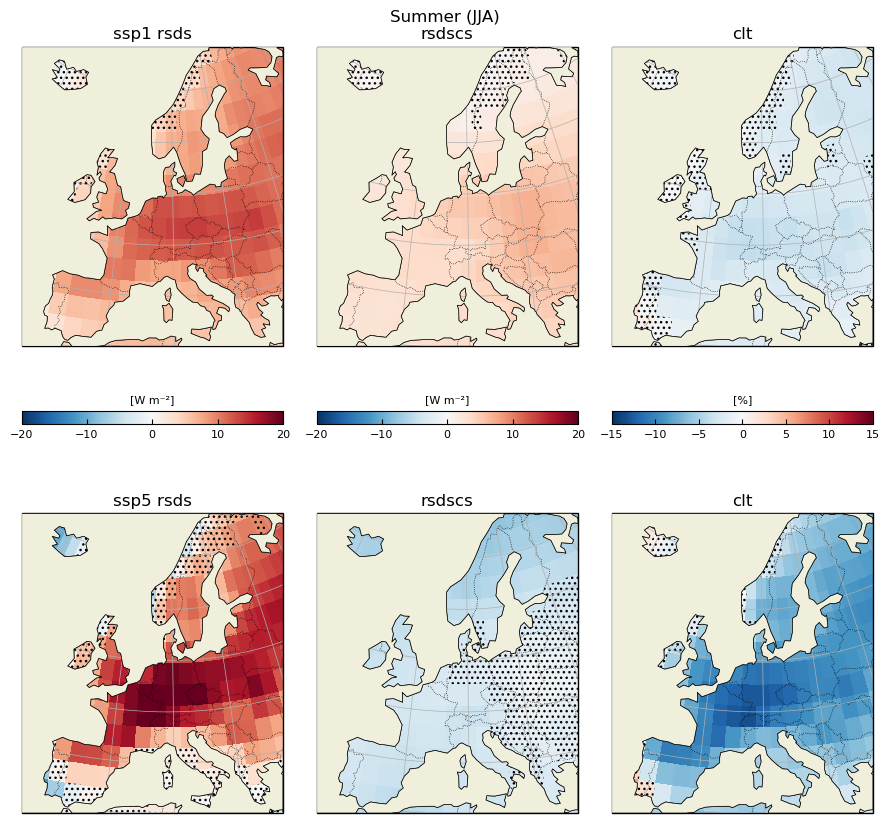

In [32]:
fig = plt.figure(figsize=(9,9))
for i in 1:6
    ax = plt.subplot(2,3, i, projection=proj3)
    ax.coastlines(linewidth=.5)
    ax.gridlines(linewidth=.5)
    ax.add_feature(cfeature.BORDERS, linewidth=.5, linestyle=":")
    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor="k", lw=.5, facecolor=cfeature.COLORS["land"]) 
    wrap_data, wrap_lon = cput.add_cyclic_point(varChSum[i]', coord=lon, axis=1)    
    wrap_agr, wrap_lon = cput.add_cyclic_point(varAgrSum[i], coord=lon, axis=1)
    i in [3,6] ?
        (vmin, vmax) = (-15, 15) : (vmin, vmax) = (-20, 20)
    p = ax.pcolormesh(wrap_lon, lat, wrap_data, transform=proj1, cmap="RdBu_r", vmin=vmin, vmax=vmax)
    ax.pcolor(wrap_lon, lat, wrap_agr, transform=proj1, alpha=0., hatch="...") 
    title(tlsSum[i], size=12)   
    if i <= 3
        cbar = plt.colorbar(p, orientation="horizontal") 
        cbar.ax.set_title(labs[i], size=8)
        cbar.ax.tick_params(direction="in", labelsize=8)
    end
end
plt.tight_layout()

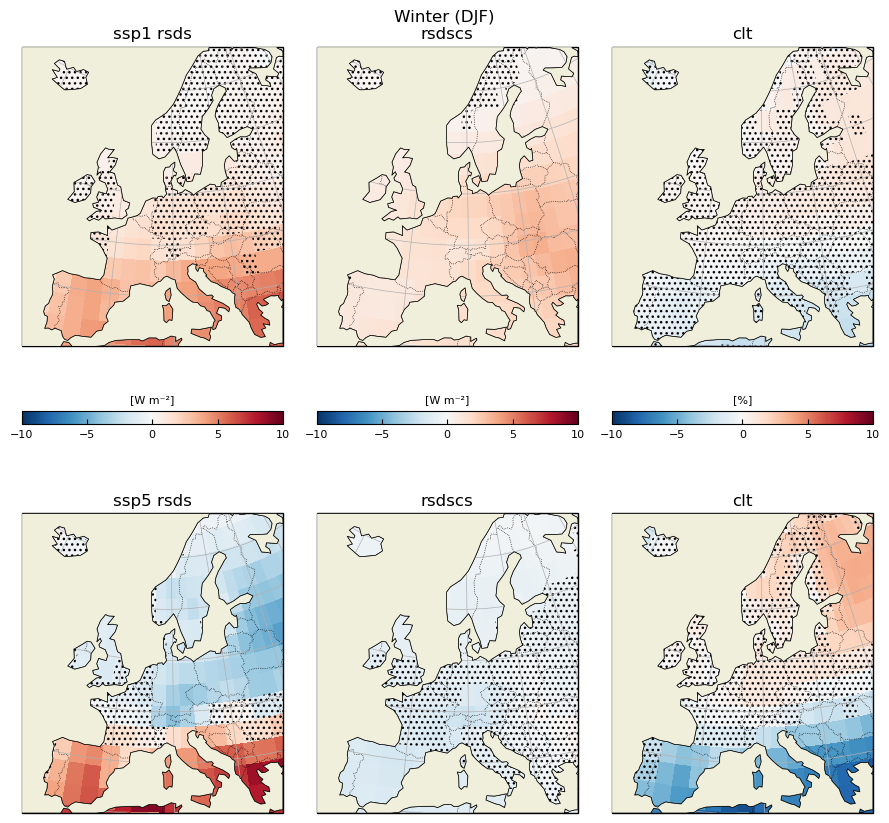

In [33]:
fig = plt.figure(figsize=(9,9))
for i in 1:6
    ax = plt.subplot(2,3, i, projection=proj3)
    ax.coastlines(linewidth=.5)
    ax.gridlines(linewidth=.5)
    ax.add_feature(cfeature.BORDERS, linewidth=.5, linestyle=":")
    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor="k", lw=.5, facecolor=cfeature.COLORS["land"]) 
    wrap_data, wrap_lon = cput.add_cyclic_point(varChWin[i]', coord=lon, axis=1)    
    wrap_agr, wrap_lon = cput.add_cyclic_point(varAgrWin[i], coord=lon, axis=1)
    p = ax.pcolormesh(wrap_lon, lat, wrap_data, transform=proj1, cmap="RdBu_r", vmin=-10, vmax=10)
    ax.pcolor(wrap_lon, lat, wrap_agr, transform=proj1, alpha=0., hatch="...") 
    title(tlsWin[i], size=12)   
    if i <= 3
        cbar = plt.colorbar(p, orientation="horizontal") 
        cbar.ax.set_title(labs[i], size=8)
        cbar.ax.tick_params(direction="in", labelsize=8)
        end
end
plt.tight_layout()